<div class="alert alert-info">
Кирилл, привет!
Спасибо за комментарии!
</div>

# Исследование данных молочного хозяйства и разработка моделей МО для отбора потенциального расширения поголовья

**Описание проекта:** по обращению фермера необходимо проанализировать какие факторы имеют большее влияние на получаемый удой, а также разработать модели машинного обучения, которые помогут управлять рисками и принимать объективное решение о покупке коров в стадо. Для выполнения данной задачи мы располагаем данными, предоставленными фермером, и данными, предоставленными ассоциацией пастбищ «ЭкоФерма».

Цель исследования: определить коров, пригодных к покупке в соответствии с требованиями заказчика: средний удой за год — не менее 6000 килограммов, молоко должно быть вкусным.

**Ход исследования:**
* Подготовка данных: загрузка и изучение общей информации из представленного датасета;
* Предобработка данных: переименование столбцов, обработка пропущенных значений, корректировка типа данных, обработка дубликатов и других аномалий;
* Исследовательский анализ данных: изучение основных характеристик, их распределение;
* Корреляционный анализ: поиск зависимостей между характеристиками;
* Обучений модели линейной регрессии: разработка 3-ех моделей МО и выбор наиболее точной для оценки удоя предлагаемых к покупке коров;
* Обучений модели логистической регрессии: разработка модели МО для прогнозирования вкуса молока;

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

С помощью данного исследования мы стремимся ответить на вопрос, какую корову считать пригодной к покупке, а какую нет.

## Загрузка данных

Импортируем библиотеки

In [1]:
!pip install phik -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,\
accuracy_score, confusion_matrix, recall_score, precision_score #rmse = mse(squared = False)
from sklearn.preprocessing import OneHotEncoder, StandardScaler #Encoder(drop = False)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from phik.report import correlation_report, plot_correlation_matrix

Загрузим данные

In [2]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv',sep = ';', decimal=',')
    dad_df = pd.read_csv('/datasets/ferma_dad.csv',sep = ';', decimal=',')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv',sep = ';', decimal=',')
except:
    ferma_df = pd.read_csv('F:\yandex\projects\cow_buy\ferma_main.csv',sep = ';', decimal=',')
    dad_df = pd.read_csv('F:\yandex\projects\cow_buy\ferma_dad.csv',sep = ';', decimal=',')
    cow_buy_df = pd.read_csv('F:\yandex\projects\cow_buy\cow_buy.csv',sep = ';', decimal=',')

**Изучим анализируемые данные**

In [3]:
def first_look(df):
    return display(df.info(),df.describe(),df.head(10))

Датасет с данными фермера:

In [4]:
first_look(ferma_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Датасет с информацией об именах отцов коров:

In [5]:
first_look(dad_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


Датасет с информацией о предлагаемых к покупке коров:

In [6]:
first_look(cow_buy_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,"Текущая_жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


**Вывод:** предварительный анализ предоставленных данных показывает, что необходима предобработка данных: приведение наименований столбцов к нижнему регистру, поиск дубликатов (записей в датасете ferma_df на 5 больше, нежели в dad_df), устранение неявных дубликатов.

##  Предобработка данных

### Изменение наименований столбцов

Приведем наименование столбцов к змеиному языку

Датасет с информацией от фермера:

In [7]:
ferma_df.columns = ['id', 'output', 'diet', 'food_protein', 'sugar_protein', 'breed', 
                    'location_type', 'dad_breed', 'fatness', 'protein', 'taste', 'age']

Датасет с информацией о быках

In [8]:
dad_df.columns = ['id', 'dad_name']

Датасет с информацией о предлагаемых к покупке коровах

In [9]:
cow_buy_df.columns = ['breed', 'location_type', 'dad_breed', 'dad_name',
                      'fatness', 'protein', 'age']

### Проверка наличия строк-дубликатов

##### Данные фермера:

In [10]:
ferma_df.duplicated().sum()

5

Выведем строки-дубликаты

In [11]:
ferma_df[ferma_df.duplicated(keep = False)]

,id,output,diet,food_protein,sugar_protein,breed,location_type,dad_breed,fatness,protein,taste,age
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Как видно, все строки относятся к одному id, следовательно их необходимо исключить из анализа и сообщить фермеру о том, что в поданых им данных присутствует повторяющиеся записи для id = 627

In [12]:
ferma_df.drop_duplicates(inplace = True)

Датасет с информацией о быках

In [13]:
dad_df.duplicated().sum()

0

##### Данные пастбища

In [14]:
cow_buy_df.duplicated().sum()

4

In [15]:
cow_buy_df[cow_buy_df.duplicated(keep = False)]

,breed,location_type,dad_breed,dad_name,fatness,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Устранение неявных дубликатов

#### Тип пастбища

При первичном анализе данных замечено, что в столбце с типом пастбища присутствует неявные дубликаты - строки с похожим названием типа пастбища.

In [16]:
ferma_df['location_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [17]:
def location_equate(row):
    if row == 'Холмистое':
        return 'холмистое'
    else:
        return 'равнинное'

In [18]:
ferma_df['location_type'] = ferma_df['location_type'].map(location_equate)

#### Порода папы быка

In [19]:
ferma_df['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [20]:
def dad_breed_equate(row):
    if row == 'Соверин':
        return 'Соверин'
    else:
        return 'Айдиал'

In [21]:
ferma_df['dad_breed'] = ferma_df['dad_breed'].map(dad_breed_equate)

Неявные дубликаты вероятнее всего обусловлены человеческим фактором при ручной записи информации в датасет.

**Вывод:** в ходе предобработки данных было проведено приведение наименований столбцов датасетов к змеиному языку, найдены и исключены из анализа строки-дубликаты. Возможными причинами наличия строк-дубликатов может быть человеческий фактор - при ручном вводе данных или баг при автоматической записи. При загрузке и знакомстве с данными обнаружено отсутствие пропусков в данных.

## Исследовательский анализ данных

В качестве признаков удоя можно выделить следующие факторы:
* характеристики коровы: id, порода(breed), порода папы быка(dad_breed), возраст(age);
* характеристики корма: ЭКЕ (Энергетическая кормовая единица)(diet), сырой протеин,г (food_protein), СПО (Сахаро-протеиновое соотношение)(sugar_protein);
* характеристика пастбища: тип пастбища (location_type).

В качетсве признаков вкуса молока можно выделить следующие факторы:
* характеристики молока: жирность,% (fatness), белок,% (protein).

In [22]:
def quant_feature(data):
    display(data.describe())
    data.plot(kind = 'box', grid = True, figsize = (9,7))
    plt.title(f'Диаграмма размаха {data.name}', size = 15)
    plt.xlabel(data.name, size = 12)
    plt.show()
    data.hist(bins = 15, figsize = (9,7), edgecolor='black')
    plt.title(f'Гистограмма {data.name}', size = 15)
    plt.ylabel('Количество записей', size = 12)

In [23]:
def qual_feature(data):
    display(f'Количество уникальных значений в столбце равно {data.nunique()}')
    display(data.value_counts())
    data.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (9, 7))
    plt.title(f'Круговая диаграмма {data.name}', size = 15)
    plt.show()

### Анализ характеристик коров

#### Порода

'Количество уникальных значений в столбце равно 2'

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64

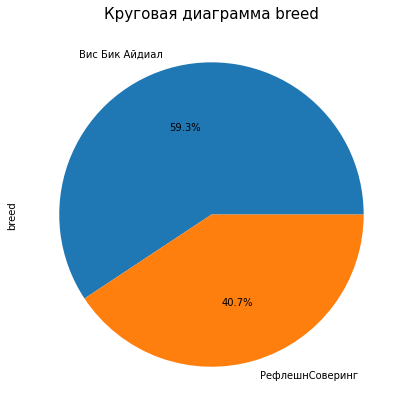

In [24]:
qual_feature(ferma_df['breed'])

Из анализа породы видно, что всего в стаде 2 породы коров, при этом коров Вис Бик Айдиал почти на 10% больше, нежели РефлешнСоверинг

#### Порода папы быка

'Количество уникальных значений в столбце равно 2'

Айдиал     318
Соверин    311
Name: dad_breed, dtype: int64

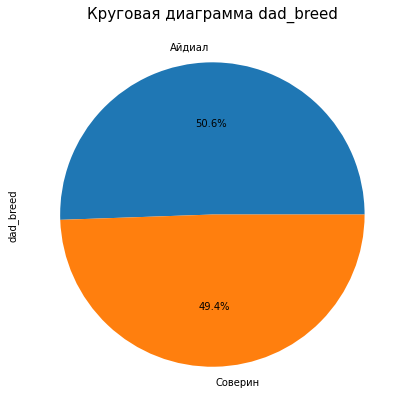

In [25]:
qual_feature(ferma_df['dad_breed'])

Анализ показал, что в стаде 2 породы быков, самая многочисленная - Айдиал.

#### Возраст

'Количество уникальных значений в столбце равно 2'

более_2_лет    519
менее_2_лет    110
Name: age, dtype: int64

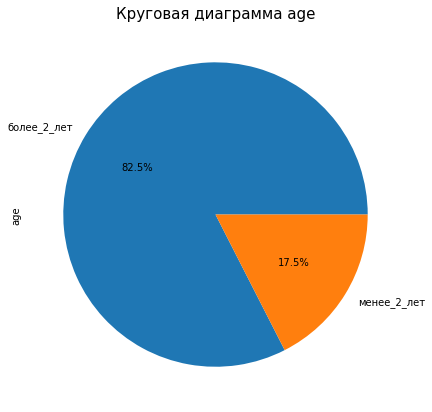

In [26]:
qual_feature(ferma_df['age'])

Из анализа заметно, что коров возраста более двух лет - превалирующее большинство: в 4 раза больше, нежеле коров моложе 2-ух лет

#### Имя папы-быка

'Количество уникальных значений в столбце равно 4'

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64

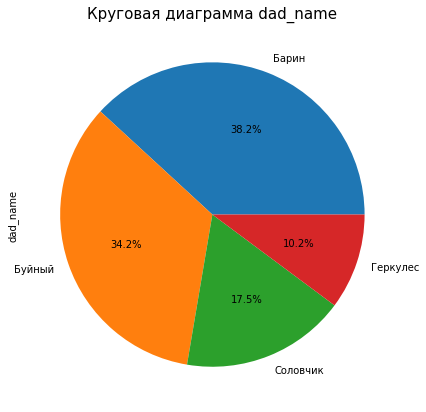

In [27]:
qual_feature(dad_df['dad_name'])

Всего в датасете информация о быках с 4-мя именами. Больше всего быков с именем Барин и Буйный.

### Анализ характеристик корма

#### ЭКЕ (Энергетическая кормовая единица)

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: diet, dtype: float64

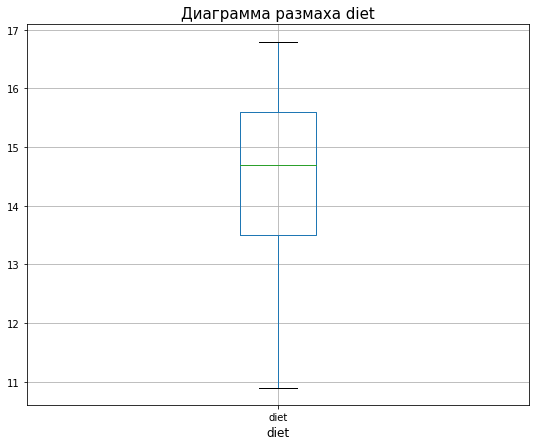

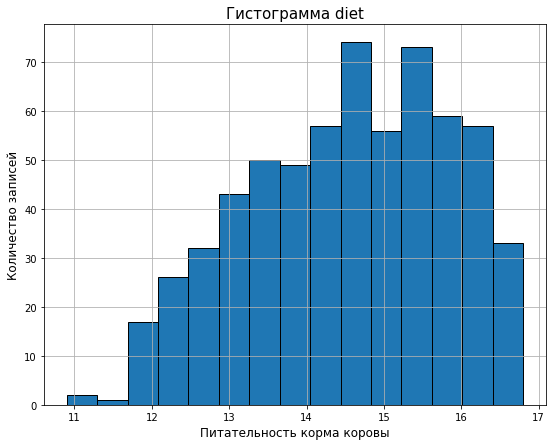

In [28]:
quant_feature(ferma_df['diet'])
plt.xlabel('Питательность корма коровы', size = 12)
plt.show()

In [29]:
ferma_df[ferma_df['diet'] <= 11.5]

,id,output,diet,food_protein,sugar_protein,breed,location_type,dad_breed,fatness,protein,taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
456,457,5288,11.1,1925,0.88,РефлешнСоверинг,равнинное,Соверин,3.33,3.074,не вкусно,менее_2_лет
581,582,5573,10.9,1955,0.84,Вис Бик Айдиал,холмистое,Соверин,3.39,3.079,вкусно,менее_2_лет


Из анализа ЭКЕ видно, что записей с ЭКЕ <= 11,5 всего 3 (менее 0,5%), однако в соответствии с диаграммой размаха, их не стоит исключать из дальнейшего анализа и настройки модели МО.

Распределение ЭКЕ стремится к нормальному со средним 14,54.

#### Сырой протеин

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: food_protein, dtype: float64

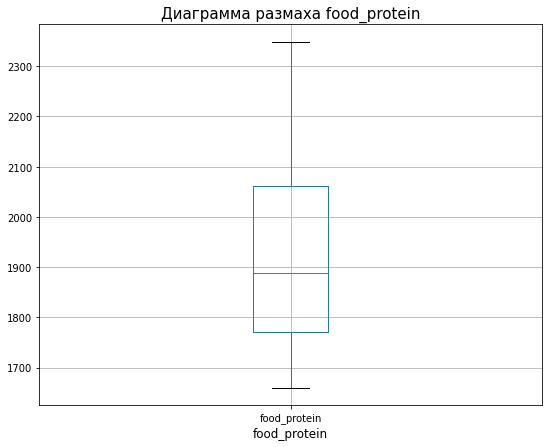

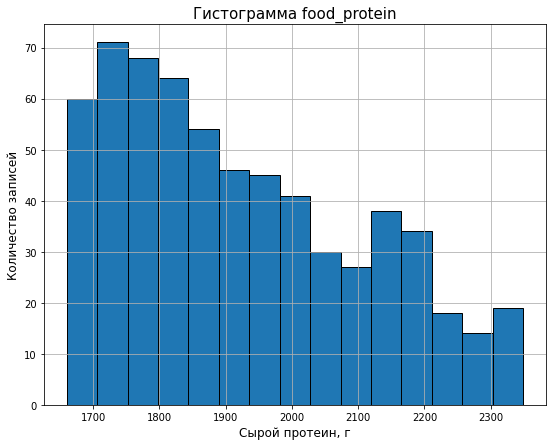

In [30]:
quant_feature(ferma_df['food_protein'])
plt.xlabel('Сырой протеин, г', size = 12)
plt.show()

Из анализа сырого протеина заметно, что большинство коров потребляет от 1800 до 2500 г протеина. Среднее потребление составляет 1923 г.

#### СПО (Сахаро-протеиновое соотношение)

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein, dtype: float64

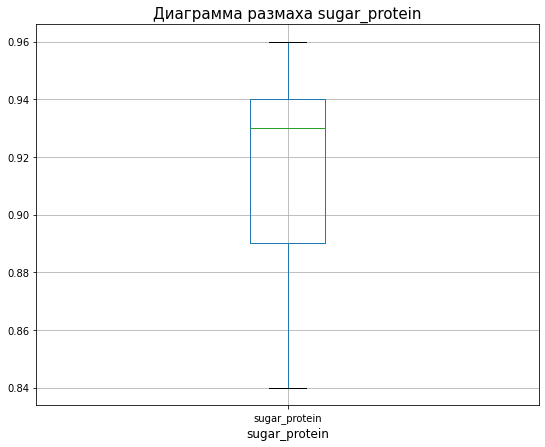

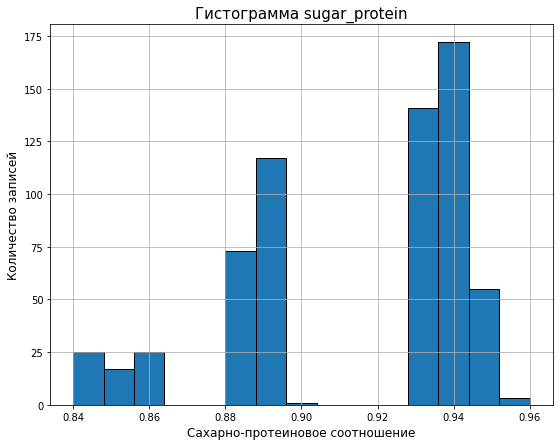

In [31]:
quant_feature(ferma_df['sugar_protein'])
plt.xlabel('Сахарно-протеиновое соотношение', size = 12)
plt.show()

In [32]:
ferma_df['sugar_protein'].value_counts()

0.940    172
0.930    141
0.890     94
0.880     58
0.950     55
0.840     25
0.860     25
0.895     23
0.850     17
0.885     15
0.960      3
0.900      1
Name: sugar_protein, dtype: int64

Анализ данных по сахарно-протеиновому соотношению показал, что данные располагаются в 3-ех промужетках:
1. 0.84 - 0.86 - низкое;
2. 0.88 - 0.90 - среднее;
3. 0.93 - 0.96 - высокое.

Больше всего записей с высоким сахарно-протеиновым соотношением.

### Анализ типа пастбища

'Количество уникальных значений в столбце равно 2'

холмистое    351
равнинное    278
Name: location_type, dtype: int64

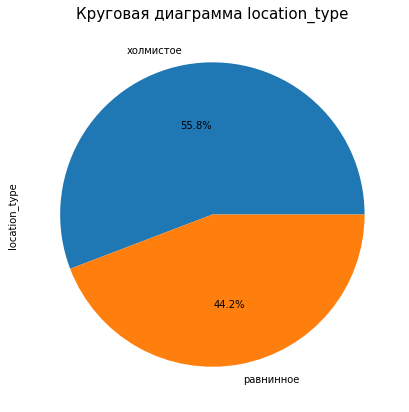

In [33]:
qual_feature(ferma_df['location_type'])

Анализ места пастбища показал, что всего есть два типа ландшафта: равнинный и холмистый. Количество записей, относящихся холмистой местности немного больше.

### Анализ характеристик молока

#### Жирность, %

##### Данные фермера

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fatness, dtype: float64

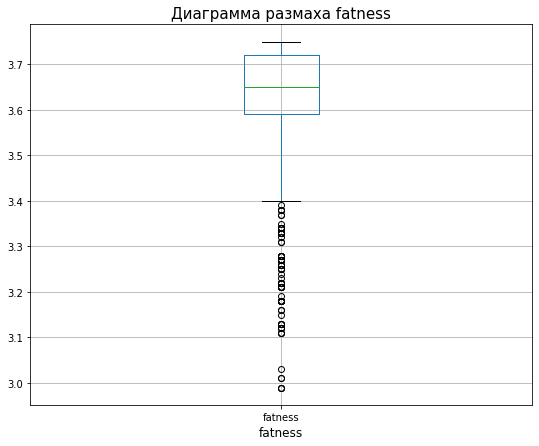

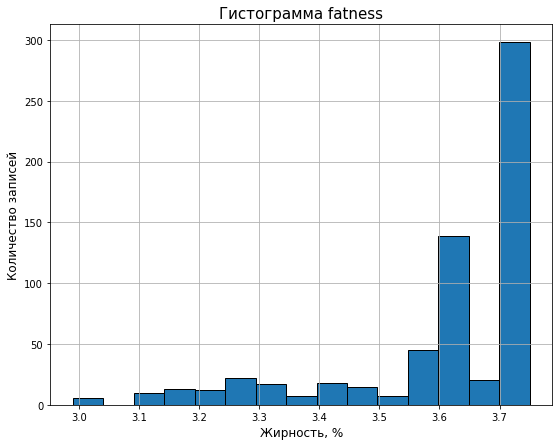

In [34]:
quant_feature(ferma_df['fatness'])
plt.xlabel('Жирность, %', size = 12)
plt.show()

Попробуем приблизить гистограмму, ограничив минимальную жирность на значении 3,4%.

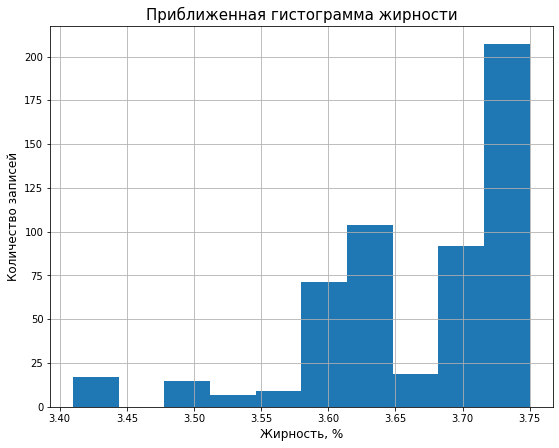

In [35]:
(
ferma_df[ferma_df['fatness']>3.4]['fatness']
    .hist(bins = 10, grid = True, figsize = (9,7))
)
plt.title('Приближенная гистограмма жирности', size = 15)
plt.ylabel('Количество записей', size = 12)
plt.xlabel('Жирность, %', size = 12)
plt.show()

Анализ данных не показал каких-либо заметных распределений. Одним из возможных вариантов может послужить замена количественного признака категориальным:
* низкая жирность - <3.5;
* средняя жирность - >= 3.5 & <3.7;
* высокая жирность - >=3.7.

In [36]:
def fatness_cat(row):
    if row <3.5:
        return 'низкая'
    if row <3.7:
        return 'средняя'
    else:
        return 'высокая'

In [37]:
ferma_df['fatness_cat'] = ferma_df['fatness'].map(fatness_cat)

'Количество уникальных значений в столбце равно 3'

высокая    298
средняя    211
низкая     120
Name: fatness_cat, dtype: int64

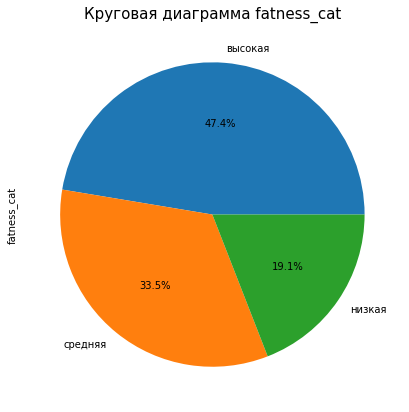

In [38]:
qual_feature(ferma_df['fatness_cat'])

Больше всего в датасете записей о коровах, дающих молоко с высокой жирностью - чуть меньше половины датасета, со средней жирностью - треть, и менее 20% с низкой жирностью.

#### Белок, %

##### Данные фермера

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

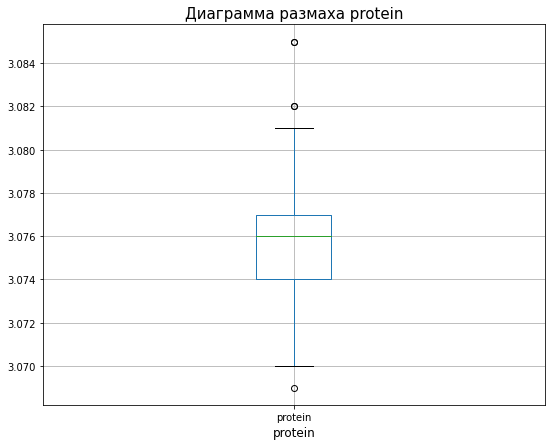

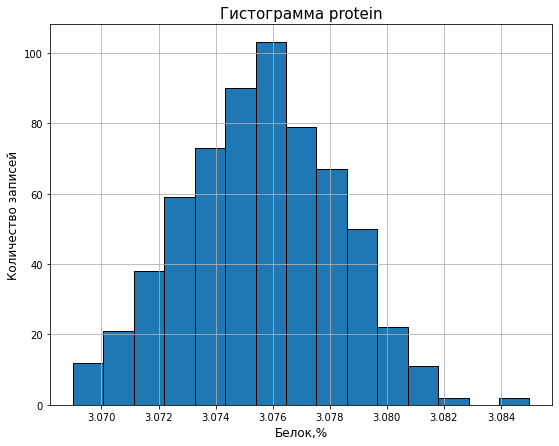

In [39]:
quant_feature(ferma_df['protein'])
plt.xlabel('Белок,%',size = 12)
plt.show()

In [40]:
ferma_df.query('protein < 3.07 or protein > 3.081')

,id,output,diet,food_protein,sugar_protein,breed,location_type,dad_breed,fatness,protein,taste,age,fatness_cat
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,равнинное,Айдиал,3.61,3.082,вкусно,более_2_лет,средняя
240,241,5568,13.4,1733,0.880,Вис Бик Айдиал,равнинное,Соверин,3.63,3.069,не вкусно,менее_2_лет,средняя
426,427,6701,15.7,2068,0.940,РефлешнСоверинг,холмистое,Айдиал,3.72,3.082,вкусно,более_2_лет,высокая
471,472,5883,14.9,2159,0.890,Вис Бик Айдиал,равнинное,Соверин,3.62,3.085,вкусно,более_2_лет,средняя
517,518,5819,13.7,1968,0.840,Вис Бик Айдиал,холмистое,Айдиал,3.15,3.085,вкусно,более_2_лет,низкая


Четко прослеживается нормальное распределение со средним 3,8%, наблюдается 5 выбросов, которые можно исключить из анализа для лучшего обучения модели.

In [41]:
ferma_df = ferma_df.query('protein>= 3.07 and protein <= 3.081')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 С одной стороны, чисто статистически видим выбросы, с другой стороны, такие показатели будут нормальными для этого признака, они находятся в границах реалистичности, можно их и не удалять.

### Анализ целевых признаков

#### Удой

count      624.000000
mean      6190.516026
std       1650.905847
min       5204.000000
25%       5749.750000
50%       6136.000000
75%       6501.250000
max      45616.000000
Name: output, dtype: float64

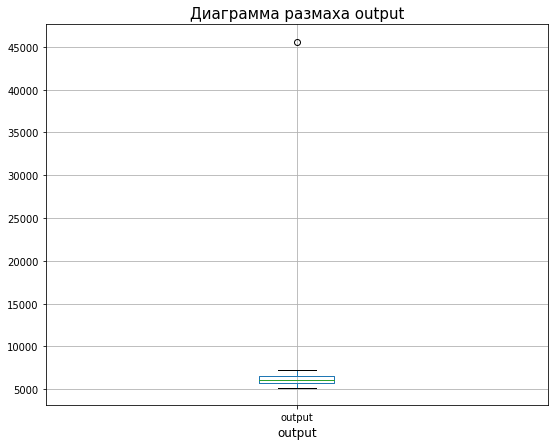

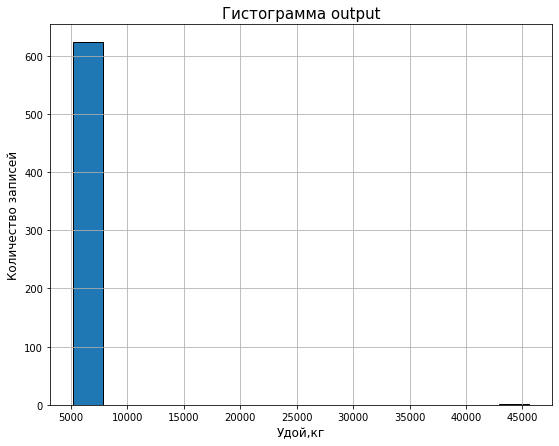

In [42]:
quant_feature(ferma_df['output'])
plt.xlabel('Удой,кг',size = 12)
plt.show()

In [43]:
ferma_df.query('output>10000')

,id,output,diet,food_protein,sugar_protein,breed,location_type,dad_breed,fatness,protein,taste,age,fatness_cat
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет,низкая


Заметен выброс со значением удоя 45 тыс. кг, что невозможно. Данный выброс неустраним, так как уменьшение значения в 10 раз приведет к тому, что данная запись станет выбросом с удоем в 4,5 тыс. кг, что меньше минимального установленного удоя.

In [44]:
ferma_df = ferma_df.query('output < 10000')

count     623.000000
mean     6127.232745
std       476.314531
min      5204.000000
25%      5748.500000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: output, dtype: float64

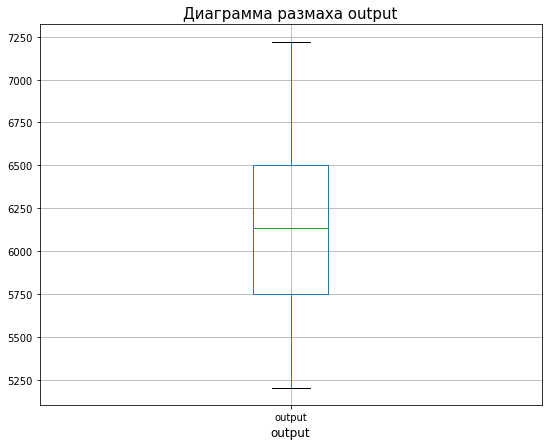

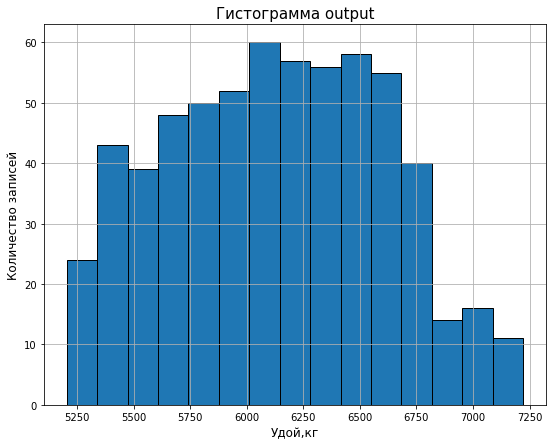

In [45]:
quant_feature(ferma_df['output'])
plt.xlabel('Удой,кг',size = 12)
plt.show()

Прослеживается нормальное распределение значений со средним удоем 6133 кг.

#### Вкус молока

'Количество уникальных значений в столбце равно 2'

вкусно       366
не вкусно    257
Name: taste, dtype: int64

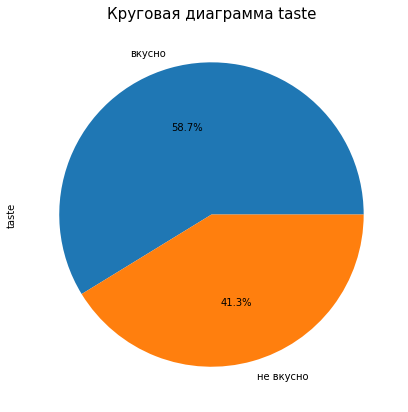

In [46]:
qual_feature(ferma_df['taste'])

Из анализа видно, что большинство коров стада дает вкусное по мнению фермера молоко.

**Вывод:** Характеристики коров: в стаде 2 породы коров, при этом коров Вис Бик Айдиал почти на 10% больше, нежели РефлешнСоверинг; в стаде 2 породы быков, самая многочисленная - Айдиал; коров возраста более двух лет - превалирующее большинство: в 4 раза больше, нежеле коров моложе 2-ух лет. Характеристики корма: в данных ЭКЕ прослеживается распределение Пуассона со смещением вправо со средним 14,54; большинство коров потребляет от 1800 до 2500 г сырого протеина, среднее потребление составляет 1923 г; данные по СПО располагаются в 3-ех промужетках: 0.84 - 0.86 - низкое, 0.88 - 0.90 - среднее, 0.93 - 0.96 - высокое, больше всего записей с высоким сахарно-протеиновым отношением. Анализ места пастбища показал, что всего есть два типа ландшафта: равнинный и холмистый, количество записей, относящихся холмистой местности немного больше. Характеристики молока: анализ данных не показал каких-либо заметных распределений, большинство коров дает молоко высокой жирности; белок распределен нормально со средним 3,8%. Целевые признаки: удой распределен нормально со средним 6133 кг; анализ вкуса молока показал, что фермер считает, что большинство его коров дает вкусное молоко. Также стоит отметить, что ЭКЕ, белок и удой распределены нормально. Анализ показал, что СПО и жирность распределены нелинейно, пошагово, для них можно провести категоризацию. 

## Корреляционный анализ

### Построение матрицы корреляции

Рассчет корреляции между количественными признаками

Для анализа зависимости количественных и качественных признаков построим матрицу с коэффициентами корреляции Фика.

In [47]:
interval_cols = ferma_df.select_dtypes('number').columns.tolist()
interval_cols

['id', 'output', 'diet', 'food_protein', 'sugar_protein', 'fatness', 'protein']

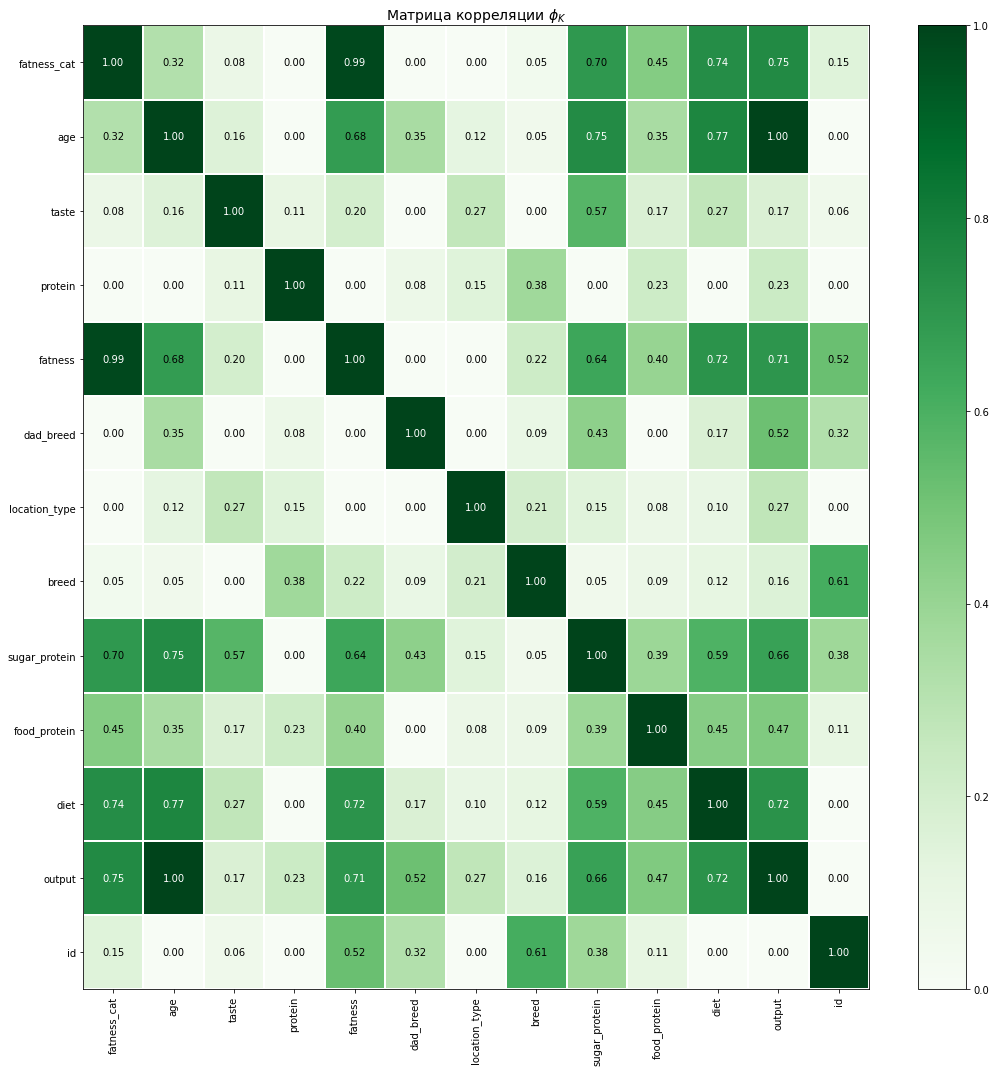

In [48]:
phik_overview = ferma_df.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляции $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(15, 15))
plt.tight_layout()

Из корреляционной матрицы видно, что id не влияет, на какие-либо признаки, что логично.

Также видно, что содержание белка в молоке вряд ли имеет зависимость от представленных переменных.

Удой наиболее сильно зависит от жирности, возраста коровы, имени быка-отца коровы, СПО, ЭКЕ.
Вкус зависит от СПО, ЭКЕ, типа пастбища.

### Построение диаграмм рассеяния

In [49]:
def scatter_ploting(quant,qual):
    plt.figure(figsize=(11, 9))
    sns.scatterplot(data = ferma_df, x = quant, y = 'output', hue = qual)
    plt.title(f'Зависимость удоя от {quant} с учетом {qual}', size = 15)
    plt.ylabel('Удой, кг', size = 12)

In [50]:
quality_features = (ferma_df.columns
                    .drop(interval_cols)
                    .drop(['taste', 'fatness_cat']))
#вычленяем категорийные переменные
quality_features

Index(['breed', 'location_type', 'dad_breed', 'age'], dtype='object')

#### Зависимость удоя от ЭКЕ

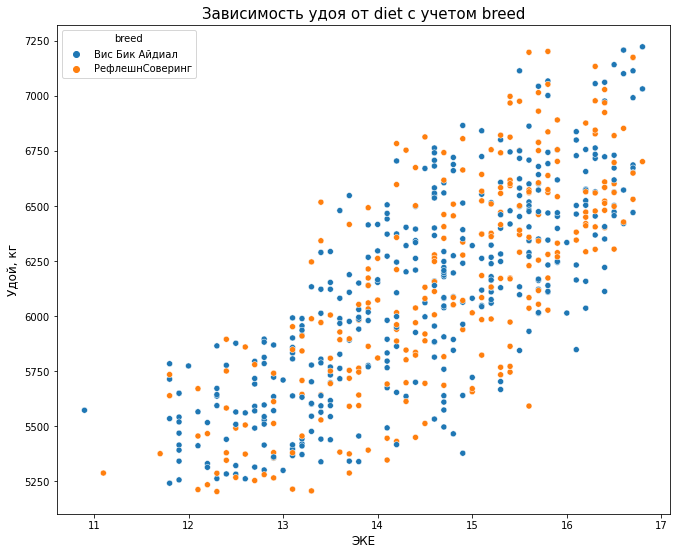

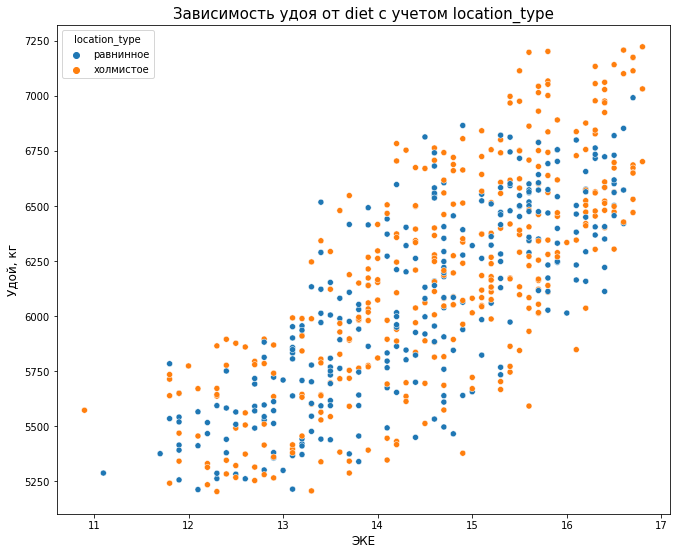

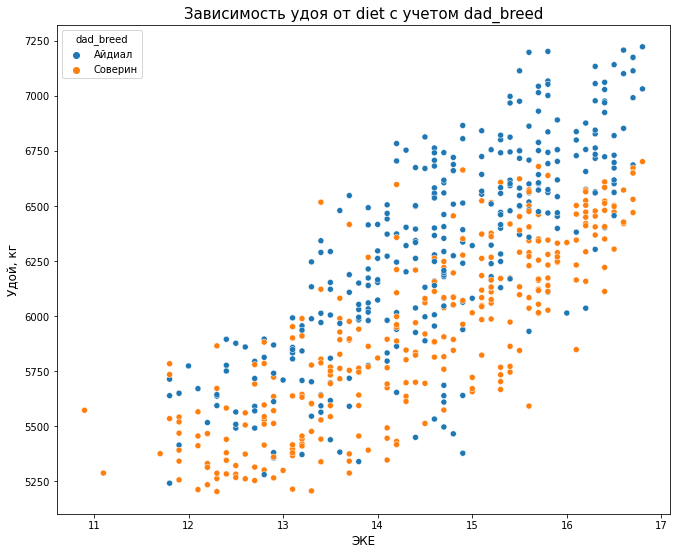

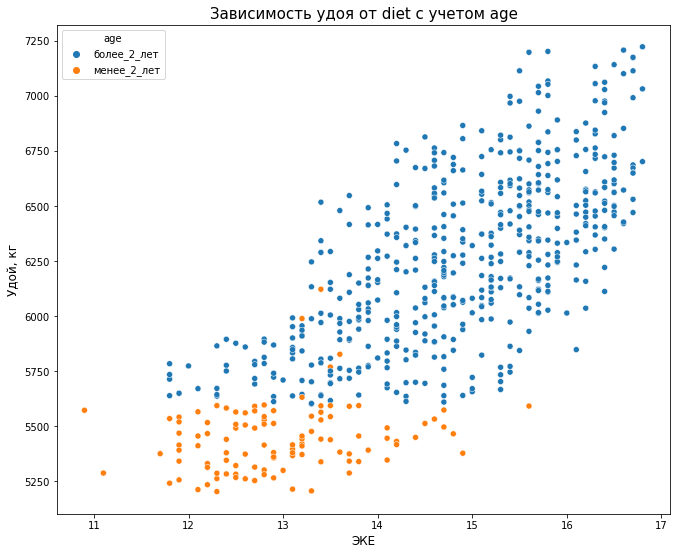

In [51]:
for feature in quality_features:
    scatter_ploting('diet',feature)
    plt.xlabel('ЭКЕ', size = 12)

Прослеживается пораболическая связь удоя и ЭКЕ. Среди невлияющих на удой категориальных признаков можно выделить: порода, тип местности.

Среди влияющих на удой категориальных признаков наблюдаются следующие зависимости:
* коровы с породой быка отца Айдиал дают больше молока, нежели Соверин;
* молодые коровы дают больше молока;
* наибольший удой обеспечивается большим СПО;
* большой удой соответствует высокому содержанию жирности. 

Для лучшего обучения модели необходимо привести пораболическую зависимость к линейной. Данного эффекта можно достигнуть засчет возведения в квадрат значения ЭКЕ.

In [52]:
ferma_df['sq_diet'] = ferma_df['diet']**2

#### Зависимость удоя от содержания сырого протеина

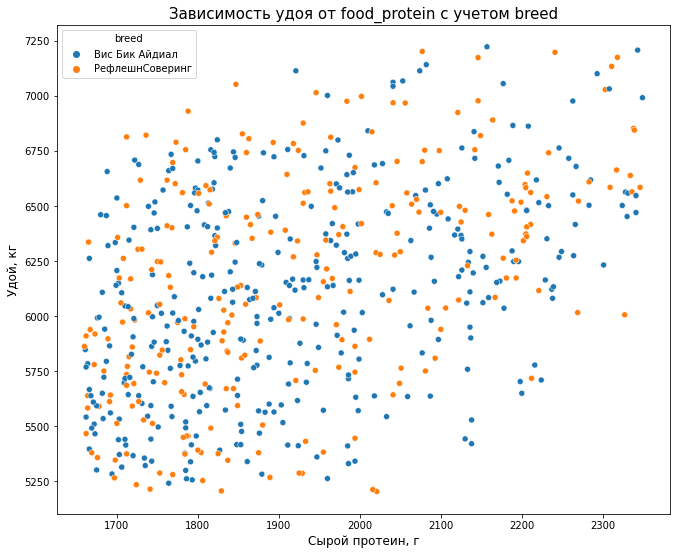

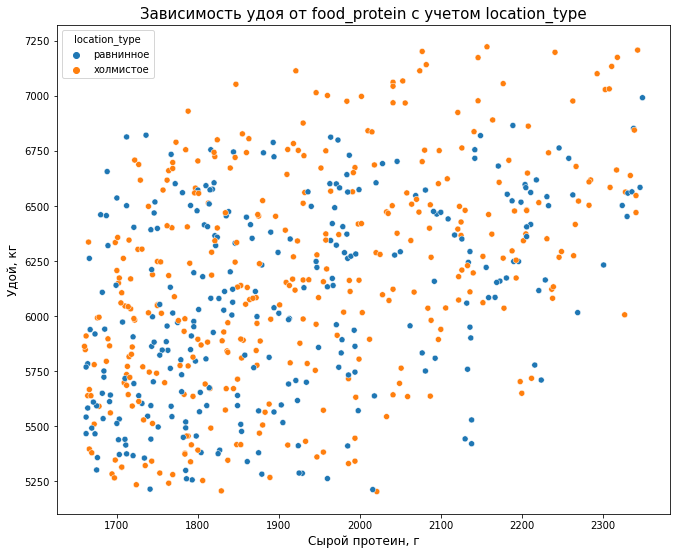

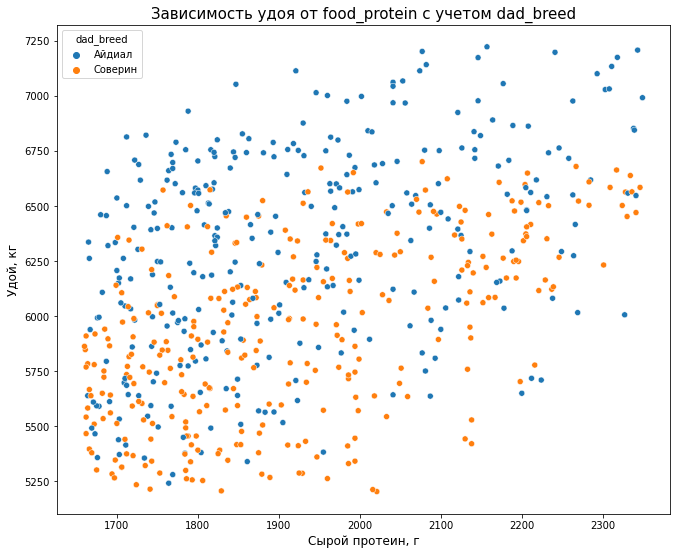

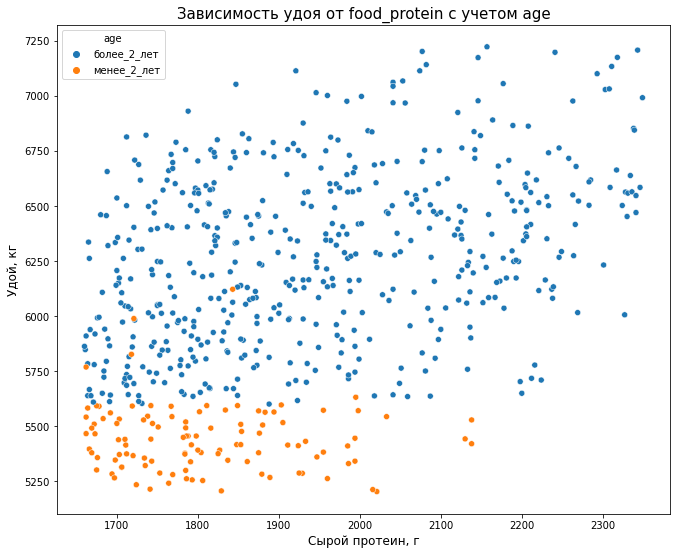

In [53]:
for feature in quality_features:
    scatter_ploting('food_protein',feature)
    plt.xlabel('Сырой протеин, г', size = 12)

Четкой связи между содержанием сырого протеина в корме и удоя при взгялде на диаграмму рассеяния не прослеживается. Среди невлияющих на удой категориальных признаков можно выделить: порода, тип местности.

#### Зависимость удоя от СПО

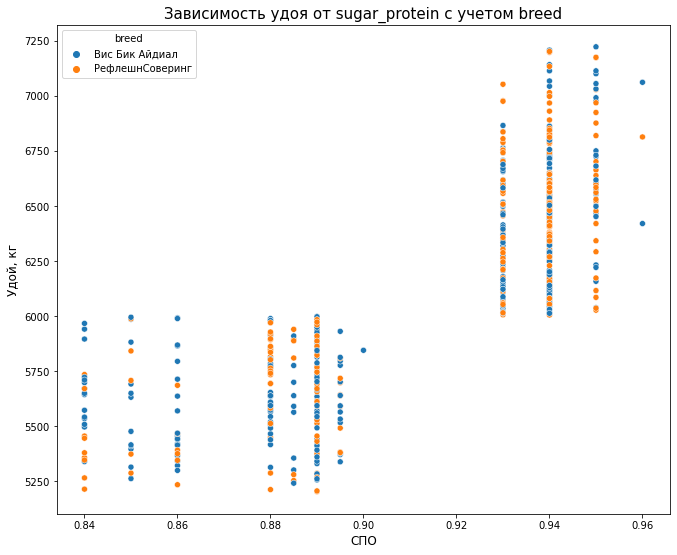

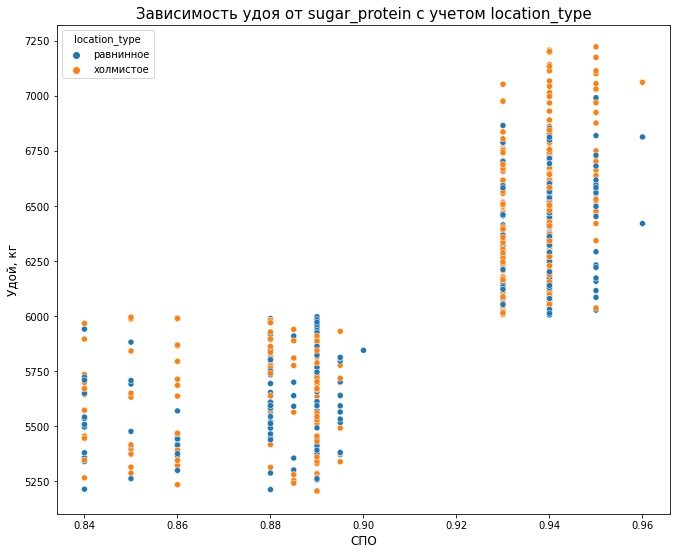

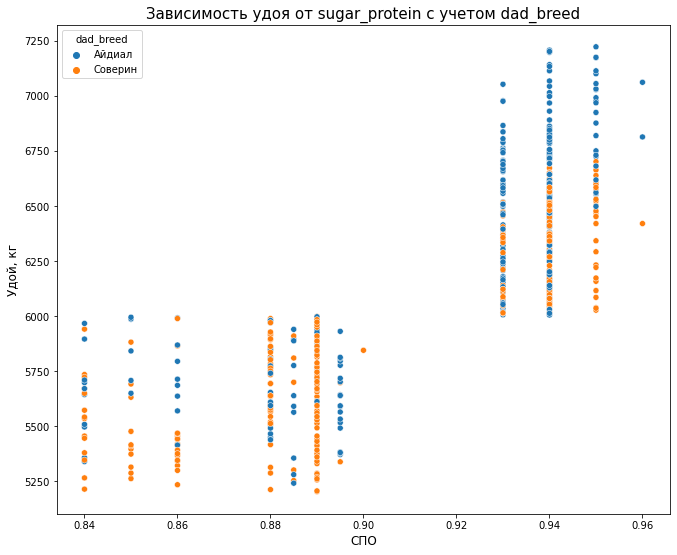

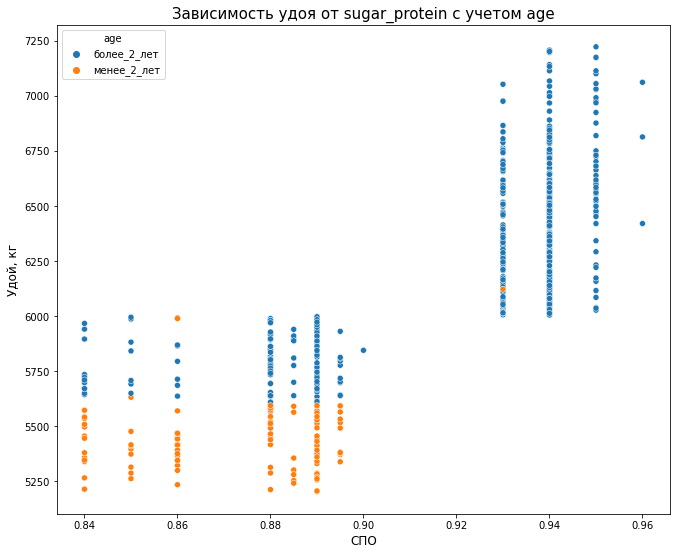

In [54]:
for feature in quality_features:
    scatter_ploting('sugar_protein',feature)
    plt.xlabel('СПО', size = 12)

Для лучшего обучения модели необходимо привести категоризацию данного параметра.

In [55]:
def sugar_protein_cat(row):
    if row < 0.91:
        return 'низкое'
    else:
        return 'высокое'

In [56]:
ferma_df['sugar_protein_cat'] = ferma_df['sugar_protein'].map(sugar_protein_cat)

**Вывод:** анализируя полученные матрицы корреляции и построенные диаграммы рассеяния, заметно наличие следующих связей: 1) пораболическая связь, между удоем и ЭКЕ; 2) коровы с отцом быком породы Айдал дают больше молока; 3) молодые коровы дают больше молока; 4) увеличение СПО способствует увеличению удоя; 5) большому удою характерна высокая жирность. Порода и тип местности не влияют на значение получаемого удоя.

## Обучение модели линейной регрессии

Перед выделением целевого признака необходимо добавить в анализируемый датасет информацию об именах отцов коров из датасета "dad_df" для обучения третьей модели.

In [57]:
ferma_df = ferma_df.merge(dad_df, on = 'id', how = 'inner')

Выделим целевой признак:

In [58]:
X = ferma_df.drop(['output','taste'], axis = 1)
y = ferma_df['output']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state = 42)

Размер тренировочной выборки:

In [60]:
X_train.shape

(467, 14)

Размер тестовой выборки:

In [61]:
X_test.shape

(156, 14)

Напишем функцию для обучения и проверки модели линейной регрессии:

In [62]:
def linear_regression_operation(qual_features, quant_features):
#преобразование категориальных признаков
    encoder = OneHotEncoder(drop = 'first', sparse = False)
    X_train_encoded = encoder.fit_transform(X_train[qual_features])
    X_test_encoded = encoder.transform(X_test[qual_features])

#преобразование численных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[quant_features])
    X_test_scaled = scaler.transform(X_test[quant_features])

# объединение
    X_train_ready = np.concatenate([X_train_scaled, X_train_encoded],axis = 1)
    X_test_ready = np.concatenate([X_test_scaled, X_test_encoded], axis = 1)

# обучение модели
    model_lr = LinearRegression()
    model_lr.fit(X_train_ready,y_train)
    predictions = model_lr.predict(X_test_ready)
    return predictions

Напишем функцию для анализа остатков:

In [63]:
def remain_analize(truth,prediction):
    data = truth - prediction
    display(data.describe())
    data.plot(x = prediction, y = data, style ='o', grid = True, figsize = (9,7))
    plt.title('Диаграмма рассеяния остатков', size = 15)
    plt.ylabel('Ошибка, кг', size = 12)
    plt.xlabel('Предсказанные значения, кг', size =12)
    plt.show()
    data.hist(bins = 15, figsize = (9,7), edgecolor='black')
    plt.title('Гистограмма остатков', size = 15)
    plt.ylabel('Количество ошибок', size = 12)
    plt.xlabel('Ошибка, кг', size = 12)
    plt.axvline(data.mean(), color='r', label = 'Среднее')
    plt.legend()
    plt.show()

In [64]:
X.columns

Index(['id', 'diet', 'food_protein', 'sugar_protein', 'breed', 'location_type',
       'dad_breed', 'fatness', 'protein', 'age', 'fatness_cat', 'sq_diet',
       'sugar_protein_cat', 'dad_name'],
      dtype='object')

### Первая модель (First Model, FM)

Исходя из выполненного анализа можно предположить, что тип пастбища и порода коровы не влияют на получаемый удой. Так же на удой не могут влиять жирность и белок получаемого молока.

Категориальные параметры удоя

In [65]:
quality_features_FM = ['dad_breed','age', 'breed', 'location_type']
quality_features_FM

['dad_breed', 'age', 'breed', 'location_type']

Численные параметры удоя

In [66]:
numeric_features_FM = ['diet','food_protein', 'sugar_protein']
numeric_features_FM

['diet', 'food_protein', 'sugar_protein']

In [67]:
predictions_FM = linear_regression_operation(
quality_features_FM, numeric_features_FM)

Коэффициент детерминации равен:

In [68]:
r2_score(y_test, predictions_FM)

0.7832029531509055

count    156.000000
mean       1.661755
std      218.640508
min     -542.551480
25%     -152.815587
50%        6.278929
75%      143.799419
max      534.283854
Name: output, dtype: float64

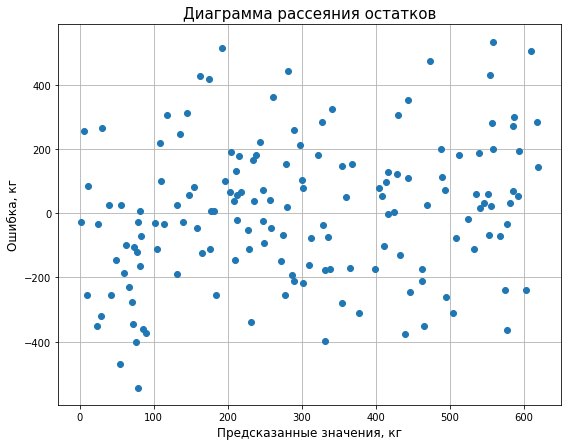

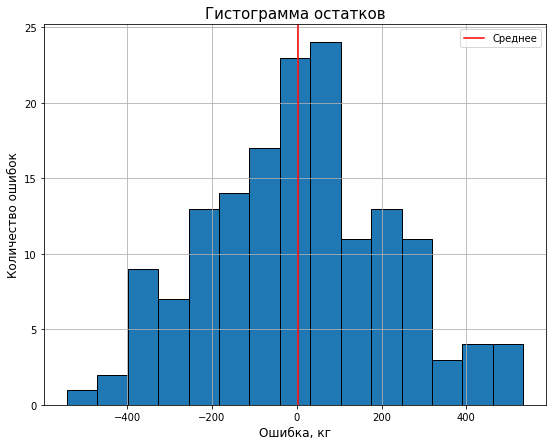

In [69]:
remain_analize(y_test, predictions_FM)

**Вывод:** полученная модель, описывающая удой в зависимости от породы быка отца коровы, ее возраста, ее породы, типа пастбища, ЭКЕ, СПО и сырого протеина без разбиения на категории и поиска нелинейных зависимостей в данных дала достаточно хороший результат: коэффициент детерминации равен 0,78. Распределение остатков нормальное, анализ показал, что модель склонна занижать удой: средняя ошибка равна 1,6 кг, медианная - 6,3 кг; стоит также отметить, что ошибка, максимальная по модулю, отрицательна. На диаграмме рассеяния остатков очевидных зависимостей нет. Однако заметны направления в которых возможно улучшение работы модели: применение категоризации к СПО, нелинейная зависимость ЭКЕ.

### Вторая модель (Second Model, SM)

Во второй модели в качестве категориальных признаков будут выступать: порода быка отца коровы, возраст, СПО. В качестве численных признаков возмем: квадрат ЭКЕ, значение сырого протеина, г.

Категориальные параметры удоя

In [70]:
quality_features_SM = ['dad_breed','age', 'sugar_protein_cat', 'breed', 'location_type']
quality_features_SM

['dad_breed', 'age', 'sugar_protein_cat', 'breed', 'location_type']

Численные параметры удоя

In [71]:
numeric_features_SM = ['sq_diet','food_protein']
numeric_features_SM

['sq_diet', 'food_protein']

In [72]:
predictions_SM = linear_regression_operation(
quality_features_SM, numeric_features_SM)

Коэффициент детерминации равен:

In [73]:
r2_score(y_test, predictions_SM)

0.8347436421181885

count    156.000000
mean       3.739640
std      190.858617
min     -439.606621
25%     -141.297877
50%       -0.889187
75%      111.063231
max      526.741200
Name: output, dtype: float64

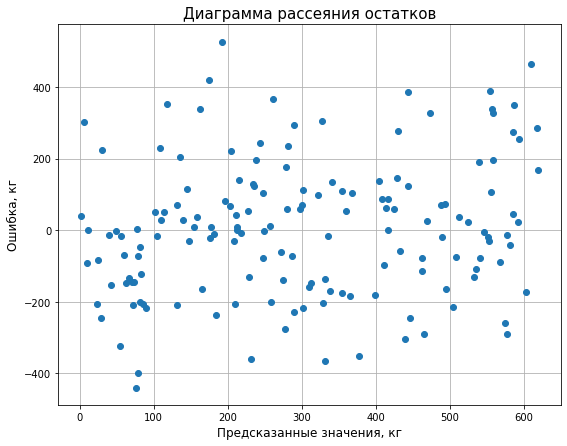

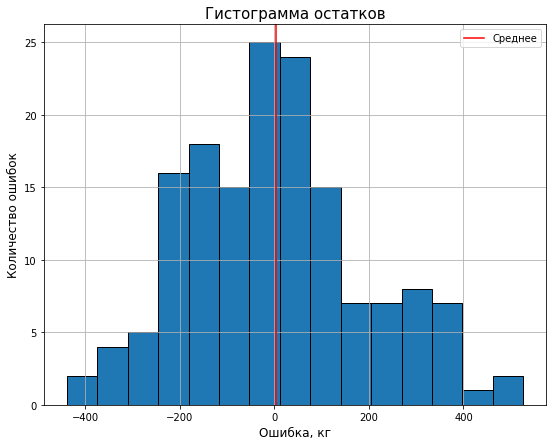

In [74]:
remain_analize(y_test, predictions_SM)

**Вывод:** полученная модель, описывающая удой в зависимости от породы быка отца коровы, ее возраста, ЭКЕ в квадрате, СПО (категоризированного), породы, типа пастбища и сырого протеина дала хороший результат: коэффициент детерминации равен 0.835. Распределение остатков нормальное, анализ показал, что модель склонна занижать удой: средняя ошибка равна 3.7 кг, медианная - -0,9 кг; стоит также отметить, что ошибка, максимальная по модулю, положительна. На диаграмме рассеяния остатков очевидных зависимостей нет. Однако нельзя не отметить сужение разброса остатков. Два выброса приводят к достаточно высокому среднему, но есть вероятность, что такие выбросы связаны с данными, содержащимися в выборке, определенной в качестве тестовой.

### Третья модель (Third Model, TM)

В качестве возможного улучшения модели предлагается добавить одну категорийную переменную: имя быка отца коровы.

Категориальные параметры удоя

In [75]:
quality_features_TM = ['age', 'sugar_protein_cat', 'dad_name', 'location_type', 'breed']
quality_features_TM

['age', 'sugar_protein_cat', 'dad_name', 'location_type', 'breed']

Численные параметры удоя

In [76]:
numeric_features_TM = ['sq_diet','food_protein']
numeric_features_TM

['sq_diet', 'food_protein']

In [77]:
predictions_TM = linear_regression_operation(
quality_features_TM, numeric_features_TM)

Коэффициент детерминации равен:

In [78]:
r2_score(y_test, predictions_TM)

0.8431654640899503

count    156.000000
mean      14.627286
std      185.387789
min     -461.070458
25%     -104.614377
50%       15.007340
75%      119.249407
max      508.069202
Name: output, dtype: float64

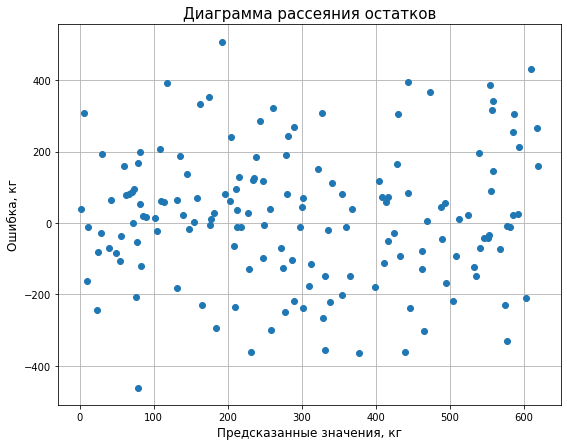

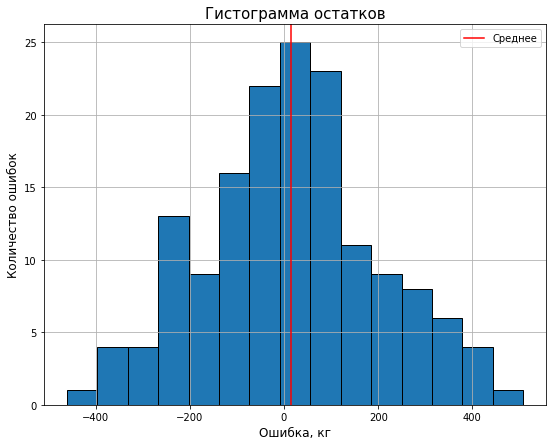

In [79]:
remain_analize(y_test, predictions_TM)

**Вывод:** полученная модель, описывающая удой в зависимости от породы, имени быка отца коровы, ее возраста, ЭКЕ в квадрате, СПО (категоризированного) и сырого протеина дала лучший результат: коэффициент детерминации равен 0.84. Распределение остатков нормальное, анализ показал, что модель более склонна занижать удой: средняя ошибка равна 16,8 кг, медианная - 15,1 кг; стоит также отметить, что ошибка, максимальная по модулю, положительна. На диаграмме рассеяния остатков очевидных зависимостей нет.

### Общий анализ моделей

In [80]:
def model_analize (model_predictions):
    errors = y_test - model_predictions
    return (r2_score(y_test,model_predictions),
           mean_absolute_error(y_test,model_predictions),
           mean_squared_error(y_test,model_predictions),
           mean_squared_error(y_test,model_predictions, squared = False),
           np.percentile(errors,50) + np.percentile(errors,2.5),
           np.percentile(errors,50) + np.percentile(errors,97.5))

In [81]:
analize_table = pd.DataFrame(data = [
    model_analize(predictions_FM),
    model_analize(predictions_SM),
    model_analize(predictions_TM)],
                            columns = 
                            ['r_2','MAE','MSE','RMSE','mean + 2.5_perc','mean + 97.5_perc'],
                            index = ['first_model','second_model','third_model'])

analize_table

,r_2,MAE,MSE,RMSE,mean + 2.5_perc,mean + 97.5_perc
first_model,0.783203,173.801223,47499.999455,217.944946,-372.287091,452.535275
second_model,0.834744,149.719800,36207.490016,190.282658,-352.935001,385.520118
third_model,0.843165,144.196652,34362.277893,185.370650,-341.818909,401.846029


На основании проведенного анализа, учитывая расчитанные для каждой модели метрики, наилучшей является третья модель, которая хоть и более склонна завышать показатель удоя, судя по бОльшему значению средней ошибки, имеет лучшие метрики $R^2$, MAE, MSE, RMSE. Доверительный интервал равен [-341.8, 401.8].

**в качестве прогнозной модели выбираем третью**

### Прогнозирование значения удоя коров пастбища

В соответствиями с условиями задачи новопоступившие на ферму коровы будут питаться по улучшенной диете: увеличение ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) на 5%.

Добавим недостающие данные в датасет с информацией о предлагаемых к покупке коровах.

In [82]:
cow_buy_df['sq_diet'] = (ferma_df['diet'].mean()*1.05)**2
cow_buy_df['food_protein'] = ferma_df['food_protein'].mean()*1.05

При проведении исследовательского анализа данных было выяснено, что среднее СПО для коров на ферме равно 0,913, что при категоризации является высоким показателем. Поэтому при приеме коров ожидается, что все они будут питаться кормом с высоким СПО.

In [83]:
cow_buy_df['sugar_protein_cat'] = 'высокое'
cow_buy_df['sugar_protein'] = ferma_df['sugar_protein'].mean()*1.05

Стандартизация и энкодинг в соответствии с третьей моделью

In [84]:
#преобразование категориальных признаков
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_encoded = encoder.fit_transform(X_train[['age', 'sugar_protein_cat', 'dad_name', 'location_type', 'breed']])
cow_buy_encoded = encoder.transform(cow_buy_df[['age', 'sugar_protein_cat', 'dad_name', 'location_type', 'breed']])

#преобразование численных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['sq_diet','food_protein']])
cow_buy_scaled = scaler.transform(cow_buy_df[['sq_diet','food_protein']])

#объединение
X_train_ready = np.concatenate([X_train_scaled, X_train_encoded],axis = 1)
cow_buy_ready = np.concatenate([cow_buy_encoded, cow_buy_scaled],axis = 1)

#прогнозирование
model_lr = LinearRegression()
model_lr.fit(X_train_ready,y_train)
prob_output = model_lr.predict(cow_buy_ready)

In [85]:
cow_buy_df['prob_output'] = prob_output

cow_buy_df[cow_buy_df['prob_output'] >=6000]

,breed,location_type,dad_breed,dad_name,fatness,protein,age,sq_diet,food_protein,sugar_protein_cat,sugar_protein,prob_output
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,высокое,0.958947,6136.028255
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6144.259800
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,высокое,0.958947,6216.124547
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.378833,2019.77191,высокое,0.958947,6328.375465
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.378833,2019.77191,высокое,0.958947,6017.008176
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6012.905892
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,высокое,0.958947,6136.028255
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,высокое,0.958947,6216.124547
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6486.123741
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,233.378833,2019.77191,высокое,0.958947,6762.029251


**Вывод:** проведя анализ моделей линейной регрессии, определили в качестве пригодной к прогнозированию 3-ю модель, описывающую удой в зависимости от породы, имени быка отца коровы, ее возраста, ее породы, типа пастбища, ЭКЕ в квадрате, СПО (категоризированного) и сырого протеина. Полученный доверительный интервал модели = [-341.8, 401.8], рассчитанный $R^2$ = 0.84. С помощью модели определены коровы, пригодные к покупке, с предсказанным удоем более 6000 кг.

## Обучение модели логистической регрессии

На вкус молока могут влиять как характеристики коровы, корма, пастбища, молока. Поэтому оставим все данные для построения модели логистической регрессии.

### Разделение на тестовую и тренировочную выборки

In [86]:
def taste_split(row):
    if row == 'вкусно':
        return 1
    else:
        return 0
ferma_df['taste_splited'] = ferma_df['taste'].map(taste_split)

In [87]:
X = ferma_df.drop(['output','taste','taste_splited','id'], axis = 1)
y = ferma_df['taste_splited']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state = 42)

Размер тренировочной выборки:

In [89]:
X_train.shape

(467, 13)

Размер тестовой выборки:

In [90]:
X_test.shape

(156, 13)

In [91]:
X.columns

Index(['diet', 'food_protein', 'sugar_protein', 'breed', 'location_type',
       'dad_breed', 'fatness', 'protein', 'age', 'fatness_cat', 'sq_diet',
       'sugar_protein_cat', 'dad_name'],
      dtype='object')

### Выбор признаков влияющих на вкус молока

In [92]:
logr_interval_cols = (X.select_dtypes('number')
                      .columns
                      .drop(['diet','fatness'])
                      .tolist())
logr_interval_cols

['food_protein', 'sugar_protein', 'protein', 'sq_diet']

В соответствии с матрицей корреляции фика на вкус молока не влияют имя быка, его порода, порода коровы.

In [93]:
logr_quality_cols = (X.columns
                     .drop(logr_interval_cols)
                     .drop(['fatness','diet','dad_breed']))
logr_quality_cols

Index(['breed', 'location_type', 'age', 'fatness_cat', 'sugar_protein_cat',
       'dad_name'],
      dtype='object')

Так как в качестве входного признака мы используем категорированную жирность, необходимо категорировать жирность в датасете с коровами, предлагаемыми к покупке.

In [94]:
cow_buy_df['fatness_cat'] = cow_buy_df['fatness'].map(fatness_cat)

### Обучение и проверка модели

In [95]:
#преобразование категориальных признаков
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_encoded = encoder.fit_transform(X_train[logr_quality_cols])
X_test_encoded = encoder.transform(X_test[logr_quality_cols])

#преобразование численных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[logr_interval_cols])
X_test_scaled = scaler.transform(X_test[logr_interval_cols])

#объединение
X_train_ready = np.concatenate([X_train_scaled, X_train_encoded],axis = 1)
X_test_ready = np.concatenate([X_test_scaled, X_test_encoded], axis = 1)

# обучение модели
clf = LogisticRegression()
clf.fit(X_train_ready,y_train)
logr_predictions = clf.predict(X_test_ready)

display(f'Рассчитанное значение точности логистической модели {accuracy_score(y_test, logr_predictions):.4f}')


'Рассчитанное значение точности логистической модели 0.6538'

Вычиисленная точность довольно низкая: 65%. Это может быть объяснено тем, что наша модель не обладает достаточным количеством входных признаков, есть неизвестный признак или признаки, имеющие достаточно высокое влияение на вкус молока. Также стоит отметить, что вкус молока в нашем случае довольно субъективный фактор, который в соответствии с текстом задания основан на личных предпочтениях фермера. Это значит, что показатель вкуса может быть не связан с объективными (измеримыми) признаками молока.

Построим матрицу ошибок:

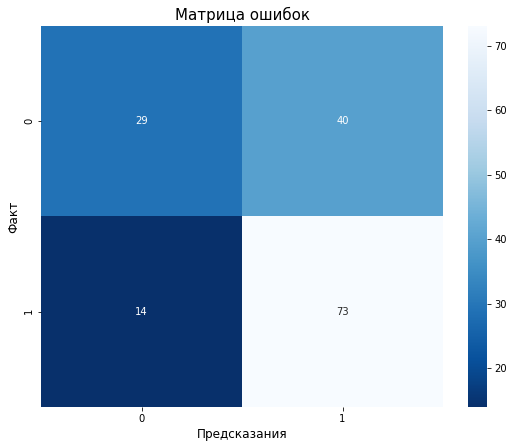

In [96]:
cm = confusion_matrix(y_test,logr_predictions)
plt.figure(figsize = (9,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', size = 15)
plt.xlabel('Предсказания', size = 12)
plt.ylabel('Факт', size = 12)
plt.show()

Рассчитаем recall и precission

In [97]:
precision_score(y_test,logr_predictions)

0.6460176991150443

Так как для фермера критичен вкус молока, необходимо свести к минимуму ошибку первого рода - ложноположительные выводы: precission должна быть равна 1

In [98]:
thresholds = [round(i,2) for i in np.linspace(0.5,0.9,num = 5,endpoint=False)]
thresholds

[0.5, 0.58, 0.66, 0.74, 0.82]

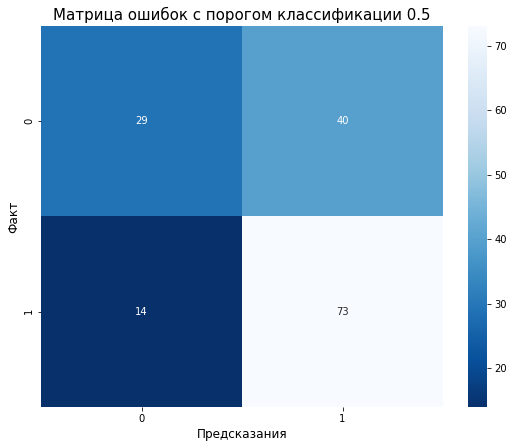

'Значение точности определения "вкусности" молока     0.654'

'Значение precision     0.646'

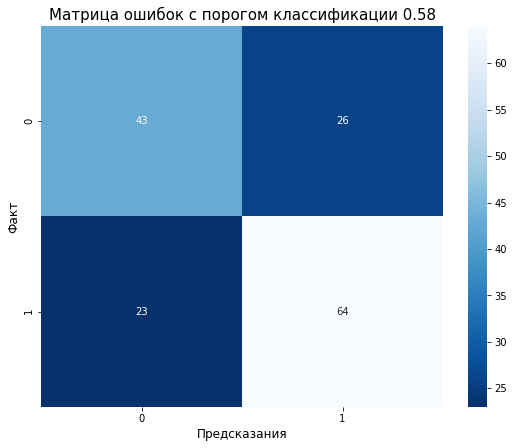

'Значение точности определения "вкусности" молока     0.686'

'Значение precision     0.711'

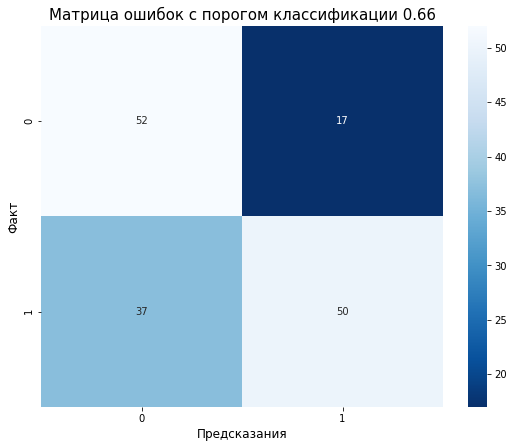

'Значение точности определения "вкусности" молока     0.654'

'Значение precision     0.746'

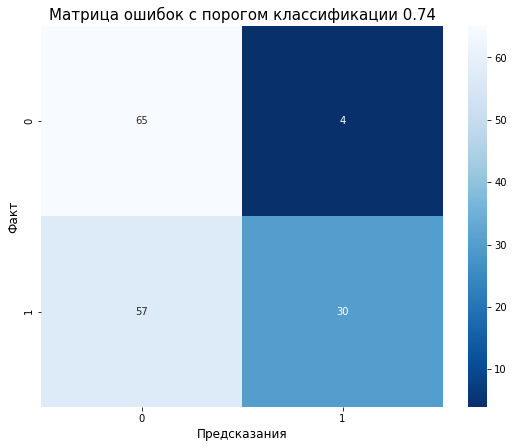

'Значение точности определения "вкусности" молока     0.609'

'Значение precision     0.882'

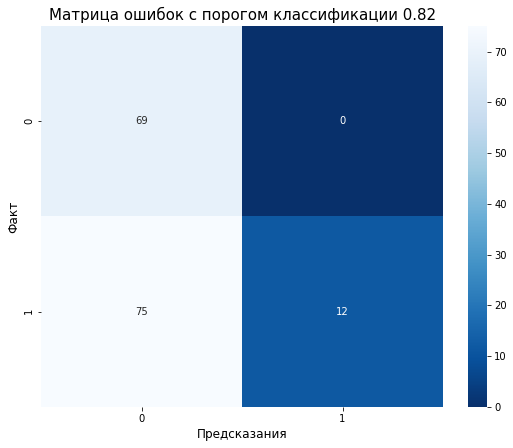

'Значение точности определения "вкусности" молока     0.519'

'Значение precision     1.000'

In [99]:
for i in thresholds:
    preds = np.where(clf.predict_proba(X_test_ready)[:,1] > i,1,0)
    cm = confusion_matrix(y_test,preds)
    plt.figure(figsize = (9,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.title(f'Матрица ошибок c порогом классификации {i}', size = 15)
    plt.xlabel('Предсказания', size = 12)
    plt.ylabel('Факт', size = 12)
    plt.show()
    display(f'Значение точности определения "вкусности" молока \
    {accuracy_score(y_test,preds):.3f}')
    display(f'Значение precision \
    {precision_score(y_test,preds):.3f}')

Precision равный 1 наблюдается при пороговом значении 0.82. Выбираем в качестве порога 0.82.

### Определение вкуса молока коров, предлагаемых к покупке

In [100]:
#преобразование категориальных признаков
cow_buy_df_encoded = encoder.transform(cow_buy_df[logr_quality_cols])

#преобразование численных признаков
cow_buy_df_scaled = scaler.transform(cow_buy_df[logr_interval_cols])

#объединение
cow_buy_df_ready = np.concatenate([cow_buy_df_scaled, cow_buy_df_encoded], axis = 1)

# вычисление вкуса молока
taste_predictions = np.where(clf.predict_proba(cow_buy_df_ready)[:,1] > 0.82,1,0.)


taste_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0.])

In [101]:
cow_buy_df.loc[:,'prob_taste'] = taste_predictions

Выведем на экран коров, для которых предсказанное значение вкуса молока считается моделью, как вкусное.

In [102]:
cow_buy_df.query('prob_taste == 1')

,breed,location_type,dad_breed,dad_name,fatness,protein,age,sq_diet,food_protein,sugar_protein_cat,sugar_protein,prob_output,fatness_cat,prob_taste
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6486.123741,низкая,1.0
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6654.743461,низкая,1.0
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,233.378833,2019.77191,высокое,0.958947,6762.029251,высокая,1.0


Модель предсказывает, что 3 коровы, предлагаемые к покупке дают вкусное молоко. Также можно заметить, что значение удоя этих коров превышает 6000 кг.

**Вывод:** при обучении модели логистической регрессии получили неоднозначные результаты: низкая точность модели - 62%, высокий порог классификации - 0.82. Такие результаты привели к тому, что разработанная модель предсказала всего 3 коровы, дающие вкусное молоко. Это может быть следствием отсутствия достаточного количества входных признаков: есть неизвестный признак или признаки, имеющие достаточно высокое влияение на вкус молока или необъективностью определения категории "вкусное молоко".

## Итоговые выводы

Можно дополнительно удостовериться в том, что эти коровы подойдут к покупке, применив к предсказанному удою доверительный интервал модели линейной регрессии. Так как требование накладывается по минимальному необходимому удою, возьмем положительную ошибку и вычтем ее из предсказанного значения.

In [103]:
cow_buy_df['min_prob_output'] = cow_buy_df['prob_output'] - 401.8
cow_buy_df.query('min_prob_output > 6000 and prob_taste == 1')

,breed,location_type,dad_breed,dad_name,fatness,protein,age,sq_diet,food_protein,sugar_protein_cat,sugar_protein,prob_output,fatness_cat,prob_taste,min_prob_output
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6486.123741,низкая,1.0,6084.323741
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,233.378833,2019.77191,высокое,0.958947,6654.743461,низкая,1.0,6252.943461
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,233.378833,2019.77191,высокое,0.958947,6762.029251,высокая,1.0,6360.229251


**По итогам применения разработанных моделей, рекомендованы к покупке 3 коровы, у которых с 95% точностью удой выше 6000 кг, а молоко вкусное с вероятностью более 82%.**

В настоящей работе было проведено исследование данных владельца молочного хозяйства «Вольный луг», разработаны модели линейной и логистической регрессии для определения пригодных к покупке коров.

Исследование:

**Предобработка данных**, которая включала изменение наименований столбцов, проверку наличия дубликатов. Возможными причинами наличия строк-дубликатов может быть человеческий фактор - при ручном вводе данных или баг при автоматической записи. Пропуски в данных не обнаружены.

**Исследовательский анализ данных**, в ходе которого были проанализированы: ***характеристики коров***: в стаде 2 породы коров, при этом коров Вис Бик Айдиал почти на 10% больше, нежели РефлешнСоверинг; в стаде 2 породы быков, самая многочисленная - Айдиал; коров возраста более двух лет - превалирующее большинство: в 4 раза больше, нежеле коров моложе 2-ух лет, ***характеристики корма***: в данных ЭКЕ прослеживается нормальное распределение со смещением вправо со средним 14,54; большинство коров потребляет от 1800 до 2500 г сырого протеина, среднее потребление составляет 1923 г; данные по СПО располагаются в 3-ех промужетках, больше всего записей с высоким сахарно-протеиновым отношением, ***тип пастбища***:есть два типа ландшафта: равнинный и холмистый, количество записей, относящихся холмистой местности немного больше, ***характеристики молока***: анализ не показал каких-либо заметных распределений, большинство коров дает молоко высокой жирности; белок распределен нормально со средним 3,8%, ***целевые признаки***:  удой распределен нормально со средним 6133 кг; анализ вкуса молока показал, что фермер считает, что большинство его коров дает вкусное молоко. Также стоит отметить, что ЭКЕ, белок и удой распределены нормально. Анализ показал, что СПО и жирность распределены нелинейно, пошагово, для них проведена категоризация. 

**Корреляционный анализ**, в ходе которого построена матрица корреляций Фика, построены зависимости удоя от других численных признаков с учетом категориальных, при это установлено: 1) пораболическая связь, между удоем и ЭКЕ; 2) коровы с отцом быком породы Айдал дают больше молока; 3) молодые коровы дают больше молока; 4) увеличение СПО способствует увеличению удоя; 5) большому удою характерна высокая жирность. Порода и тип местности не влияют на значение получаемого удоя.

**Обучение модели линейной регрессии**: разработаны 3 модели линейной регрессии, выбрана самая точная, учитывающая следующие признаки: возраст, категоризированное СПО, имя быка-отца коровы, его порода, квадрат ЭКЕ, содержание сырого протеина в корме. Полученный  $R^2$ равен 0.84, доверительный интервал: [-341.8, 401.8]. Определены коровы пригодные к покупке с точки зрения достаточности удоя.

**Обучение модели логистической регрессии** разработана модель логистической регрессии, учитывающая следующие признаки: содержание сырого протеина в корме, СПО не категоризированное, жирность,%, белок,%, квадрат ЭКЕ, тип пастбища, возраст. Точность модели равна 0.62, выбранный порог классификации 0.82.

На основании разработанных моделей были предсказаны значения удоя и вкус молока предлагаемых к покупке коров. Однако, из-за  отсутствия достаточного количества входных признаков: есть неизвестный признак или признаки, имеющие достаточно высокое влияение на вкус молока или необъективностью определения категории "вкусное молоко" модель, прогнозирующая вкус молока предсказала всего 3 коровы, у которых с 95% точностью удой выше 6000 кг, а молоко вкусное с вероятностью более 82%.

В качестве предложений по улучшению работы моделей могуть быть рекомендованы: сбор дополнительных данных с целью увеличения тренировочной выборки, поиск нелийнеых зависимостей между уже имеющимися входными признаками и целевыми с целью устранения нелинейности (можно ожидать более наглядную нелинейность при увеличении анализируемой выборки, в настоящий момент нелинейность незаметна), добавление дополнительных входных признаков, изменение которых бОльшим образом влияет на удой и вкус молока, также можно предложить фермеру увеличить объективность категории "вкусное молоко" с помощью определения данной категории не единолично, а на основании результатов голования нескольких людей.

Для анализа рисков и проведения экономических расчетов в задачах классификации важны обе метрики: precision и recall. Дальнейший анализ которых зависит от задачи, бизнес-метрики. В нашем случае неизвестно, сколько потеряет фермер, если не возьмет корову, подходящую под его критерии, и наоборот - возмет неподходящую, поэтому мы минимизируем шанс взять неподходящую корову.